In [25]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [26]:
import pandas as pd # Data-Frame Handling

Data = pd.read_csv("./Data/train.csv")
Data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [27]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [28]:
# Find the Base-Truth 

base_truth = Data['Survived'].mean()
other_truth = 1-base_truth
print (base_truth, other_truth)

ground_truth = max(base_truth, other_truth)
print(ground_truth)

0.383838383838 0.616161616162
0.616161616162


In [29]:
Corr_mat = Data.corr()
Corr_mat

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [30]:
Corr_mat["Survived"].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

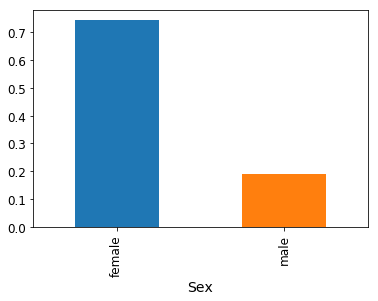

In [31]:
## 성별 only

Class_Sex = Data.groupby('Sex').mean()
Class_Sex
Class_Sex['Survived'].plot.bar()

In [32]:
Data.groupby('Pclass').mean()

# See the Correlation Matrix "pclass" vs "fare"
# Why Correlation between "pclass" and "fare" has (large) negative value?

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


In [33]:
Class_sex_pclass= Data.groupby(['Pclass','Sex']).mean()
Class_sex_pclass

PassengerId  Survived        Age     SibSp     Parch  \
Pclass Sex                                                            
1      female   469.212766  0.968085  34.611765  0.553191  0.457447   
       male     455.729508  0.368852  41.281386  0.311475  0.278689   
2      female   443.105263  0.921053  28.722973  0.486842  0.605263   
       male     447.962963  0.157407  30.740707  0.342593  0.222222   
3      female   399.729167  0.500000  21.750000  0.895833  0.798611   
       male     455.515850  0.135447  26.507589  0.498559  0.224784   

                     Fare  
Pclass Sex                 
1      female  106.125798  
       male     67.226127  
2      female   21.970121  
       male     19.741782  
3      female   16.118810  
       male     12.661633

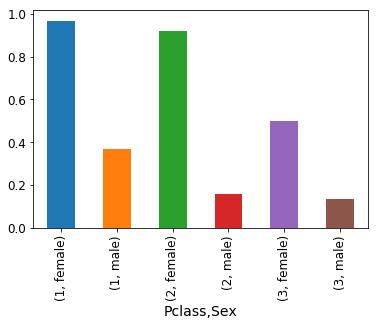

In [34]:
Class_sex_pclass['Survived'].plot.bar()

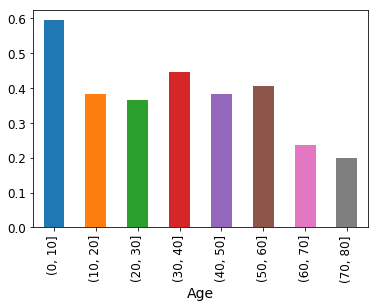

In [35]:
Group_by_age = pd.cut(Data["Age"], np.arange(0,90,10))
Class_age = Data.groupby(Group_by_age).mean()
#Class_age
Class_age['Survived'].plot.bar()

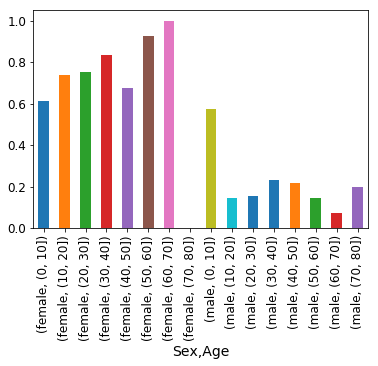

In [36]:
Class_Age_Pclass = Data.groupby(["Sex",Group_by_age]).mean()
Class_Age_Pclass['Survived'].plot.bar()

In [37]:
Data.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [38]:
## Cabin Preprocessing -> Cabin_bool = Null = 0, Other = 1 

Data.loc[Data["Cabin"].str.contains('.',regex=True,na=False),"Cabin_Bin"] = 1
Data["Cabin_Bin"].fillna(0, inplace=True)

Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Bin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0


In [39]:
Data = Data.drop(["Cabin"],axis=1)
Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_Bin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0.0


In [40]:
Data = Data.dropna()

In [41]:
Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_Bin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0.0


In [42]:
## Parch > 0 and Age < 10

Data.loc[(Data["Parch"]>0) & (Data["Age"]<10),"Child_with_Parent"] = 1
Data["Child_with_Parent"].fillna(0, inplace=True)
#Data.head()

Data["Survived"].loc[Data["Child_with_Parent"] == 1].sum() / len(Data["Survived"].loc[Data["Child_with_Parent"] == 1])

0.60655737704918034

In [43]:
from sklearn import preprocessing

processed_df = Data.copy()
le = preprocessing.LabelEncoder()
processed_df.Sex = le.fit_transform(processed_df.Sex)
processed_df.Embarked = le.fit_transform(processed_df.Embarked)
processed_df.Cabin_Bin = le.fit_transform(processed_df.Cabin_Bin)
processed_df.Child_with_Parent = le.fit_transform(processed_df.Child_with_Parent)

processed_df = processed_df.drop(['Name','Ticket','PassengerId'],axis=1)

In [44]:
processed_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_Bin,Child_with_Parent
0,0,3,1,22.0,1,0,7.2500,2,0,0
1,1,1,0,38.0,1,0,71.2833,0,1,0
2,1,3,0,26.0,0,0,7.9250,2,0,0
3,1,1,0,35.0,1,0,53.1000,2,1,0
4,0,3,1,35.0,0,0,8.0500,2,0,0


In [45]:
Corr_mat = processed_df.corr()
Corr_mat
#print(Corr_mat["Survived"].sort_values(ascending=False))


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_Bin,Child_with_Parent
Survived,1.000000,-0.356462,-0.536762,-0.082446,-0.015523,0.095265,0.266100,-0.181979,0.320733,0.126027
Pclass,-0.356462,1.000000,0.150826,-0.365902,0.065187,0.023666,-0.552893,0.244145,-0.737721,0.140114
Sex,-0.536762,0.150826,1.000000,0.099037,-0.106296,-0.249543,-0.182457,0.109639,-0.143177,-0.071039
Age,-0.082446,-0.365902,0.099037,1.000000,-0.307351,-0.187896,0.093143,-0.032565,0.244981,-0.540527
SibSp,-0.015523,0.065187,-0.106296,-0.307351,1.000000,0.383338,0.139860,0.033064,-0.031345,0.451310
Parch,0.095265,0.023666,-0.249543,-0.187896,0.383338,1.000000,0.206624,0.011803,0.029509,0.356337
Fare,0.266100,-0.552893,-0.182457,0.093143,0.139860,0.206624,1.000000,-0.283510,0.490477,-0.021374
Embarked,-0.181979,0.244145,0.109639,-0.032565,0.033064,0.011803,-0.283510,1.000000,-0.239361,0.017238
Cabin_Bin,0.320733,-0.737721,-0.143177,0.244981,-0.031345,0.029509,0.490477,-0.239361,1.000000,-0.065207
Child_with_Parent,0.126027,0.140114,-0.071039,-0.540527,0.451310,0.356337,-0.021374,0.017238,-0.065207,1.000000


In [46]:
from sklearn import cross_validation

#X_drop_cabin = processed_df.drop(['Survived','Cabin_Bin'],axis=1).values
X = processed_df.drop(['Survived'],axis=1).values
y = processed_df['Survived'].values

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y,test_size=0.2)

# or Use the gridsearch


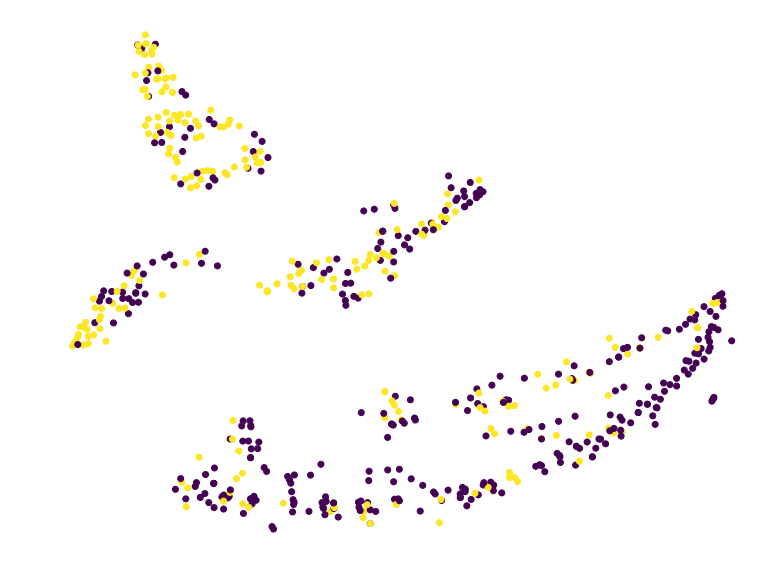

In [47]:
from sklearn.manifold import TSNE
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

pca_tsne = Pipeline([
    ("pca", PCA(n_components=4, random_state=42)),
    ("tsne", TSNE(n_components=2, random_state=42)),
])

X_reduced = pca_tsne.fit_transform(X_train)

plt.figure(figsize=(13,10))
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=y_train)

plt.axis("off")
plt.show()

In [48]:
#print ("test ratio",sum(y_test)/len(y_test))
#print ("train ratio",sum(y_train)/len(y_train))
print ("test ratio", y_test.mean())
print ("test ratio", y_train.mean())

test ratio 0.440559440559
test ratio 0.395430579965


## Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression

logit_reg = LogisticRegression()
logit_reg

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [26]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'penalty': ["l1","l2"], 'C':[0.5,1.0,2.0,999.]} 
    # Inverse of regularization Strength -> 1/C
    ]

logit_reg = LogisticRegression()
lr_grid_search = GridSearchCV(logit_reg, param_grid, cv=5,
                          scoring="accuracy")

lr_grid_search.fit(X,y)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'penalty': ['l1', 'l2'], 'C': [0.5, 1.0, 2.0, 999.0]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [27]:
pd.DataFrame(lr_grid_search.cv_results_)

/usr/local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:1

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,param_penalty,params,rank_test_score,split0_test_score,split0_train_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.004462,0.000341,0.790730,0.805834,0.5,l1,"{'C': 0.5, 'penalty': 'l1'}",3,0.797203,0.808436,...,0.762238,0.810193,0.760563,0.808772,0.808511,0.796848,0.000939,0.000091,0.025571,0.004816
1,0.001969,0.000297,0.780899,0.802321,0.5,l2,"{'C': 0.5, 'penalty': 'l2'}",8,0.783217,0.799649,...,0.755245,0.808436,0.746479,0.803509,0.808511,0.796848,0.000201,0.000048,0.026548,0.003914
2,0.003856,0.000375,0.793539,0.812855,1,l1,"{'C': 1.0, 'penalty': 'l1'}",1,0.797203,0.813708,...,0.776224,0.820738,0.781690,0.812281,0.801418,0.807356,0.000273,0.000185,0.012875,0.004484
3,0.001998,0.000272,0.790730,0.807590,1,l2,"{'C': 1.0, 'penalty': 'l2'}",3,0.804196,0.810193,...,0.755245,0.808436,0.767606,0.812281,0.808511,0.796848,0.000349,0.000110,0.024697,0.005508
4,0.003763,0.000212,0.793539,0.813204,2,l1,"{'C': 2.0, 'penalty': 'l1'}",1,0.804196,0.813708,...,0.776224,0.818981,0.781690,0.815789,0.808511,0.809107,0.000397,0.000017,0.012574,0.003996
5,0.001803,0.000204,0.790730,0.810396,2,l2,"{'C': 2.0, 'penalty': 'l2'}",3,0.804196,0.808436,...,0.769231,0.817223,0.781690,0.812281,0.801418,0.805604,0.000112,0.000016,0.013289,0.004020
6,0.003804,0.000202,0.789326,0.812854,999,l1,"{'C': 999.0, 'penalty': 'l1'}",7,0.790210,0.817223,...,0.776224,0.818981,0.781690,0.815789,0.801418,0.807356,0.000061,0.000010,0.009364,0.005629
7,0.002045,0.000233,0.790730,0.812854,999,l2,"{'C': 999.0, 'penalty': 'l2'}",3,0.790210,0.817223,...,0.776224,0.818981,0.788732,0.815789,0.801418,0.807356,0.000237,0.000034,0.008611,0.005629


In [28]:
cvres = lr_grid_search.cv_results_
#cvres

for acc, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(acc, params)
    
print (lr_grid_search.best_params_)
print (lr_grid_search.best_score_)

0.790730337079 {'C': 0.5, 'penalty': 'l1'}
0.780898876404 {'C': 0.5, 'penalty': 'l2'}
0.793539325843 {'C': 1.0, 'penalty': 'l1'}
0.790730337079 {'C': 1.0, 'penalty': 'l2'}
0.793539325843 {'C': 2.0, 'penalty': 'l1'}
0.790730337079 {'C': 2.0, 'penalty': 'l2'}
0.789325842697 {'C': 999.0, 'penalty': 'l1'}
0.790730337079 {'C': 999.0, 'penalty': 'l2'}
{'C': 1.0, 'penalty': 'l1'}
0.793539325843


## Support Vector Machine

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

svm_clf_pipe = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC())
])

param_grid = [
        {'svm_clf__kernel': ['linear'], 'svm_clf__C': [10., 100., 1000.,10000.]},
        {'svm_clf__kernel': ['rbf'], 'svm_clf__C': [1.0,10.,100.,1000.0],
         'svm_clf__gamma': [0.01,0.1,1.0,]},
    ]

svm_grid_search = GridSearchCV(svm_clf_pipe, param_grid, cv=5,
                          scoring="accuracy")

svm_grid_search.fit(X,y)

cvres = svm_grid_search.cv_results_

for acc, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(acc, params)
    
print (svm_grid_search.best_params_)
print (svm_grid_search.best_score_)

0.794943820225 {'svm_clf__C': 10.0, 'svm_clf__kernel': 'linear'}
0.794943820225 {'svm_clf__C': 100.0, 'svm_clf__kernel': 'linear'}
0.794943820225 {'svm_clf__C': 1000.0, 'svm_clf__kernel': 'linear'}
0.794943820225 {'svm_clf__C': 10000.0, 'svm_clf__kernel': 'linear'}
0.787921348315 {'svm_clf__C': 1.0, 'svm_clf__gamma': 0.01, 'svm_clf__kernel': 'rbf'}
0.828651685393 {'svm_clf__C': 1.0, 'svm_clf__gamma': 0.1, 'svm_clf__kernel': 'rbf'}
0.761235955056 {'svm_clf__C': 1.0, 'svm_clf__gamma': 1.0, 'svm_clf__kernel': 'rbf'}
0.818820224719 {'svm_clf__C': 10.0, 'svm_clf__gamma': 0.01, 'svm_clf__kernel': 'rbf'}
0.794943820225 {'svm_clf__C': 10.0, 'svm_clf__gamma': 0.1, 'svm_clf__kernel': 'rbf'}
0.755617977528 {'svm_clf__C': 10.0, 'svm_clf__gamma': 1.0, 'svm_clf__kernel': 'rbf'}
0.823033707865 {'svm_clf__C': 100.0, 'svm_clf__gamma': 0.01, 'svm_clf__kernel': 'rbf'}
0.761235955056 {'svm_clf__C': 100.0, 'svm_clf__gamma': 0.1, 'svm_clf__kernel': 'rbf'}
0.74297752809 {'svm_clf__C': 100.0, 'svm_clf__gamma'

## Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier()
clf_dt

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

dt_clf_pipe = Pipeline([
            #("scaler", StandardScaler()),
            ("tf_clf", clf_dt),
])

param_grid = [
        {'tf_clf__criterion': ['gini'], 'tf_clf__max_depth' : [2,3,4,5]},
        {'tf_clf__criterion': ['entropy'], 'tf_clf__max_depth' : [2,3,4,5]},
    ]

dt_grid_search = GridSearchCV(dt_clf_pipe, param_grid, cv=5,
                          scoring="accuracy")

dt_grid_search.fit(X,y)

cvres = dt_grid_search.cv_results_

for acc, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(acc, params)
    
print (dt_grid_search.best_params_)
print (dt_grid_search.best_score_)

0.790730337079 {'tf_clf__criterion': 'gini', 'tf_clf__max_depth': 2}
0.800561797753 {'tf_clf__criterion': 'gini', 'tf_clf__max_depth': 3}
0.811797752809 {'tf_clf__criterion': 'gini', 'tf_clf__max_depth': 4}
0.792134831461 {'tf_clf__criterion': 'gini', 'tf_clf__max_depth': 5}
0.790730337079 {'tf_clf__criterion': 'entropy', 'tf_clf__max_depth': 2}
0.797752808989 {'tf_clf__criterion': 'entropy', 'tf_clf__max_depth': 3}
0.792134831461 {'tf_clf__criterion': 'entropy', 'tf_clf__max_depth': 4}
0.789325842697 {'tf_clf__criterion': 'entropy', 'tf_clf__max_depth': 5}
{'tf_clf__criterion': 'gini', 'tf_clf__max_depth': 4}
0.811797752809


In [32]:
from sklearn.ensemble import RandomForestClassifier


clf_rf = RandomForestClassifier()
clf_rf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

rf_clf_pipe = Pipeline([
            #("scaler", StandardScaler()),
            ("rf_clf", clf_rf),
])

param_grid = [
        {'rf_clf__n_estimators': [10,50,100,500], 
         'rf_clf__criterion': ["gini","entropy"], 
         'rf_clf__min_samples_split': [2,3,4,5]}
    ]

rf_grid_search = GridSearchCV(rf_clf_pipe, param_grid, cv=5,
                          scoring="accuracy")

rf_grid_search.fit(X,y)

cvres = rf_grid_search.cv_results_

for acc, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(acc, params)
    
print (rf_grid_search.best_params_)
print (rf_grid_search.best_score_)

0.793539325843 {'rf_clf__criterion': 'gini', 'rf_clf__min_samples_split': 2, 'rf_clf__n_estimators': 10}
0.793539325843 {'rf_clf__criterion': 'gini', 'rf_clf__min_samples_split': 2, 'rf_clf__n_estimators': 50}
0.773876404494 {'rf_clf__criterion': 'gini', 'rf_clf__min_samples_split': 2, 'rf_clf__n_estimators': 100}
0.786516853933 {'rf_clf__criterion': 'gini', 'rf_clf__min_samples_split': 2, 'rf_clf__n_estimators': 500}
0.780898876404 {'rf_clf__criterion': 'gini', 'rf_clf__min_samples_split': 3, 'rf_clf__n_estimators': 10}
0.786516853933 {'rf_clf__criterion': 'gini', 'rf_clf__min_samples_split': 3, 'rf_clf__n_estimators': 50}
0.793539325843 {'rf_clf__criterion': 'gini', 'rf_clf__min_samples_split': 3, 'rf_clf__n_estimators': 100}
0.789325842697 {'rf_clf__criterion': 'gini', 'rf_clf__min_samples_split': 3, 'rf_clf__n_estimators': 500}
0.794943820225 {'rf_clf__criterion': 'gini', 'rf_clf__min_samples_split': 4, 'rf_clf__n_estimators': 10}
0.810393258427 {'rf_clf__criterion': 'gini', 'rf_cl

In [34]:
from sklearn.ensemble import GradientBoostingClassifier
clf_gb = GradientBoostingClassifier()
clf_gb

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

gb_clf_pipe = Pipeline([
            #("scaler", StandardScaler()),
            ("gb_clf", clf_gb),
])

param_grid = [
        {'gb_clf__n_estimators': [10,50,100,500]},
    ]

gb_grid_search = GridSearchCV(gb_clf_pipe, param_grid, cv=5,
                          scoring="accuracy")

gb_grid_search.fit(X,y)

cvres = gb_grid_search.cv_results_

for acc, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(acc, params)

print (gb_grid_search.best_params_)
print (gb_grid_search.best_score_)

0.800561797753 {'gb_clf__n_estimators': 10}
0.806179775281 {'gb_clf__n_estimators': 50}
0.821629213483 {'gb_clf__n_estimators': 100}
0.811797752809 {'gb_clf__n_estimators': 500}
{'gb_clf__n_estimators': 100}
0.821629213483


## XGBoosting

In [49]:
from xgboost import XGBClassifier
from xgboost import plot_importance

In [50]:
xg_model = XGBClassifier(booster='gbtree',seed = 42)
xg_model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42, silent=True,
       subsample=1)

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

xg_clf_pipe = Pipeline([
            #("scaler", StandardScaler()),
            ("xg_clf", xg_model),
])

param_grid = [
        {'xg_clf__base_score': [0.5,0.55,0.6,0.65,0.7], 
         'xg_clf__max_depth': [2,3,4], 
         'xg_clf__n_estimators' : [10,50,70,100]},
    ]

xg_grid_search = GridSearchCV(xg_clf_pipe, param_grid, cv=5,
                          scoring="accuracy")

xg_grid_search.fit(X,y)

cvres = xg_grid_search.cv_results_

for acc, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(acc, params)

print (xg_grid_search.best_params_)
print (xg_grid_search.best_score_)

0.797752808989 {'xg_clf__base_score': 0.5, 'xg_clf__max_depth': 2, 'xg_clf__n_estimators': 10}
0.810393258427 {'xg_clf__base_score': 0.5, 'xg_clf__max_depth': 2, 'xg_clf__n_estimators': 50}
0.803370786517 {'xg_clf__base_score': 0.5, 'xg_clf__max_depth': 2, 'xg_clf__n_estimators': 70}
0.808988764045 {'xg_clf__base_score': 0.5, 'xg_clf__max_depth': 2, 'xg_clf__n_estimators': 100}
0.790730337079 {'xg_clf__base_score': 0.5, 'xg_clf__max_depth': 3, 'xg_clf__n_estimators': 10}
0.807584269663 {'xg_clf__base_score': 0.5, 'xg_clf__max_depth': 3, 'xg_clf__n_estimators': 50}
0.807584269663 {'xg_clf__base_score': 0.5, 'xg_clf__max_depth': 3, 'xg_clf__n_estimators': 70}
0.813202247191 {'xg_clf__base_score': 0.5, 'xg_clf__max_depth': 3, 'xg_clf__n_estimators': 100}
0.806179775281 {'xg_clf__base_score': 0.5, 'xg_clf__max_depth': 4, 'xg_clf__n_estimators': 10}
0.807584269663 {'xg_clf__base_score': 0.5, 'xg_clf__max_depth': 4, 'xg_clf__n_estimators': 50}
0.810393258427 {'xg_clf__base_score': 0.5, 'xg_c

## Voting Classifier

In [39]:
lr_best_model = lr_grid_search.best_estimator_
svm_best_model= svm_grid_search.best_estimator_
dt_best_model = dt_grid_search.best_estimator_
rf_best_model = rf_grid_search.best_estimator_
gb_best_model = gb_grid_search.best_estimator_
xg_best_model = xg_grid_search.best_estimator_

from sklearn.ensemble import VotingClassifier

eclf = VotingClassifier([('lr', lr_best_model),
                         ('svm', svm_best_model),
                         ('dt', dt_best_model),
                         ('rf', rf_best_model),
                         ('gb', gb_best_model),
                         ('xg', xg_best_model),
                        ])

eclf.fit(X,y)
eclf.score(X,y)

0.8792134831460674

## Test Data _ Preprocessing

In [40]:
T_Data = pd.read_csv("./Data/test.csv")
T_Data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [41]:
T_Data.loc[T_Data["Cabin"].str.contains('.',regex=True,na=False),"Cabin_Bin"] = 1
T_Data["Cabin_Bin"].fillna(0, inplace=True)
T_Data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Bin
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0.0


In [42]:
T_Data.loc[(Data["Parch"]>0) & (T_Data["Age"]<10),"Child_with_Parent"] = 1
T_Data["Child_with_Parent"].fillna(0, inplace=True)

In [43]:
from sklearn import preprocessing

processed_df = T_Data.copy()
le = preprocessing.LabelEncoder()
processed_df.Sex = le.fit_transform(processed_df.Sex)
processed_df.Embarked = le.fit_transform(processed_df.Embarked)

processed_df.Cabin_Bin = le.fit_transform(processed_df.Cabin_Bin)

processed_df = processed_df.drop(['Name','Ticket','PassengerId','Cabin'],axis=1)

median = processed_df["Age"].median()
processed_df["Age"].fillna(median,inplace=True)

median = processed_df["Fare"].median()
processed_df["Fare"].fillna(median,inplace=True)
processed_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_Bin,Child_with_Parent
0,3,1,34.5,0,0,7.8292,1,0,0.0
1,3,0,47.0,1,0,7.0000,2,0,0.0
2,2,1,62.0,0,0,9.6875,1,0,0.0
3,3,1,27.0,0,0,8.6625,2,0,0.0
4,3,0,22.0,1,1,12.2875,2,0,0.0


In [44]:
processed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
Pclass               418 non-null int64
Sex                  418 non-null int64
Age                  418 non-null float64
SibSp                418 non-null int64
Parch                418 non-null int64
Fare                 418 non-null float64
Embarked             418 non-null int64
Cabin_Bin            418 non-null int64
Child_with_Parent    418 non-null float64
dtypes: float64(3), int64(6)
memory usage: 29.5 KB


In [45]:
import datetime
dt = datetime.datetime.now()
time_string = dt.strftime("%Y%m%d%H%M")
print (time_string)

201804091914


In [46]:
X = processed_df.values
Result = eclf.predict(X)

import time
writer = pd.ExcelWriter('output_'+time_string+".xlsx")
Sub_List = []
for i in range(len(Result)):
    Sub_List.append([T_Data["PassengerId"][i],Result[i]])
#    print(str([T_Data["PassengerId"][i])+","+str(Result[i]]))

Submission = pd.DataFrame(Sub_List)
Submission.to_excel(writer,'Sheet1')
writer.save()


## Deep Learning with TF

In [47]:
import tensorflow as tf

In [48]:
#print (len(X[0]))

n_inputs = len(X_train[0])
n_hidden1 = 100
n_hidden2 = 100
n_outputs = 2

In [49]:
X = tf.placeholder(tf.float32, shape=(None,n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name = "y")

In [50]:
def neuron_layer(X, n_neurons, name, activation=None):
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[1])

        #init = tf.truncated_normal((n_inputs,n_neurons),stddev=1.)
        
        # He Initalization
        stddev = 2 / np.sqrt(n_inputs)
        
        # Xavier
        #stddev = 1/np.sqrt(n_inputs)
        
        init = tf.truncated_normal((n_inputs, n_neurons), stddev=stddev)
        
        W = tf.Variable(init, name="kernel")
        b = tf.Variable(tf.zeros([n_neurons]), name="bias")
        Z = tf.matmul(X, W) + b
        
        # DropOut
        #keep_prob = 0.2
        #drop_out = tf.nn.dropout(Z, keep_prob)
        
        # Batch Nomalization
        batch_mean,batch_var = tf.nn.moments(Z,[0])
        scale = tf.Variable(tf.ones([n_neurons]))
        beta  = tf.Variable(tf.zeros([n_neurons]))
        Z_batch = tf.nn.batch_normalization(Z,batch_mean,batch_var,beta,scale,1e-3)
        
        if activation is not None:
            return activation(Z_batch)
        else:
            return Z

In [51]:
with tf.name_scope("dnn"):
    hidden1 = neuron_layer(X, n_hidden1, name="hidden1",
                           activation=tf.nn.sigmoid)
    hidden2 = neuron_layer(hidden1, n_hidden2, name="hidden2",
                           activation=tf.nn.sigmoid)
    logits = neuron_layer(hidden2, n_outputs, name="outputs")

In [52]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
                                                              logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [53]:
learning_rate = 0.01

with tf.name_scope("train"):
    #optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    optimizer = tf.train.AdamOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [54]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [55]:
init = tf.global_variables_initializer()
#saver = tf.train.Saver()
n_epochs = 100
batch_size = 50

In [56]:
from random import sample

def prepare_batch(X_train, y_train, batch_size):
    Batch = np.random.randint(0,len(X_train),batch_size)
    X_batch = np.stack(X_train[idx] for idx in Batch)
    y_batch = np.stack(y_train[idx] for idx in Batch)
    
    return X_batch, y_batch

In [57]:
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(len(X_train) // batch_size):
            X_batch, y_batch = prepare_batch(X_train, y_train, batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        
        if (epoch % 10 ==0):
            acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
            acc_test = accuracy.eval(feed_dict={X: X_test, y: y_test}) 
            print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)

        #save_path = saver.save(sess, checkpoint_path)

0 Train accuracy: 0.64 Test accuracy: 0.657343
10 Train accuracy: 0.76 Test accuracy: 0.734266
20 Train accuracy: 0.76 Test accuracy: 0.741259
30 Train accuracy: 0.82 Test accuracy: 0.762238
40 Train accuracy: 0.78 Test accuracy: 0.783217
50 Train accuracy: 0.8 Test accuracy: 0.748252
60 Train accuracy: 0.84 Test accuracy: 0.776224
70 Train accuracy: 0.84 Test accuracy: 0.769231
80 Train accuracy: 0.84 Test accuracy: 0.762238
90 Train accuracy: 0.86 Test accuracy: 0.797203
